## Convex Optimization :

### Convex Sets :

A set is convex if we take any two points in the set, connect these points by a straight line and the straight line is still contained withing the set.

![Alt text](https://miro.medium.com/v2/resize:fit:485/0*eWqIxBooYQS_sVe9.png)

Formal definition - 
A subset of S of a vector space is called convex if $\forall x, y \in S$ and $\forall \alpha \in [0,1]$

$$\alpha x + (1 - \alpha)y \in S$$

### Convex Functions :

The line joining any two points $f(x_1)$ and $f(x_2)$ should lie above the function curve between $x_1$ and $x_2$

Formally, a function $f(x)$ defined on a convex domain $S$ is called convex if $\forall x, y \in S$ and $\forall \alpha \in [0,1]$

$$ \alpha f(x_1) + (1 - \alpha) f(x_2) \geq f(\alpha x_1 + (1 - \alpha)x_2) $$

<img src="https://tisp.indigits.com/_images/convex_function.png" alt="drawing" width="500"/>

A key property of convex functions is that **there is only one local minimum - which is the global minimum.**

The least squares objective function, $f(x) = ||Ax-b||^2$ is a convex function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

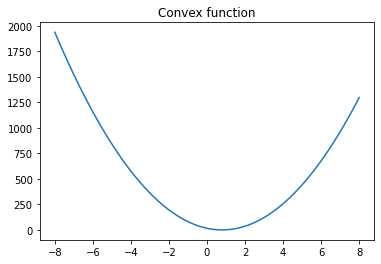

In [2]:
# Convex functions
def least_squares(x):
	return abs(5*x - 4)**2

x = np.linspace(-8, 8, 1000)
plt.plot(x, least_squares(x))
plt.title("Convex function")
plt.show()

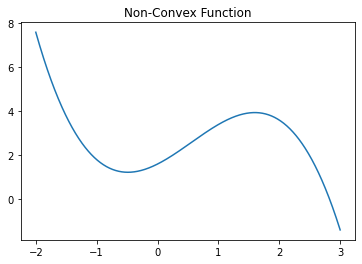

In [3]:
# Non-Convex functions
def cubic(x):
	return -0.6*(x**3) + (x**2) + 1.4*x + 1.6

x = np.linspace(-2, 3, 1000)
plt.plot(x, cubic(x))
plt.title("Non-Convex Function")
plt.show()

### Unconstrained Convex Optimization :

Minimize the convex function $f(x)$

This is pretty straightforward. We can use gradient descent, or, if possible, solve the closed-form equation

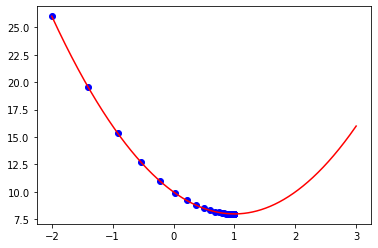

In [4]:
# Gradient Descent

def f_x(x):
	return 2*(x**2) - 4*x + 10

def df_x(x):
	return 4*(x) - 4

x = np.linspace(-2, 3, 1000)

def plot_gradient(x, y, x_vis, y_vis):
    plt.scatter(x_vis, y_vis, c="b")
    plt.plot(x, y, c="r")
    # plt.show()
     
def gradient_descent(f_x, df_x, x_start, iterations, learning_rate):
     
    x_pt = [x_start]
    y_pt = [f_x(x_start)]

    for i in range(iterations):

        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - df_x(x_start)
        
		# x = x - (alpha) * dx
        x_start += (learning_rate * x_start_derivative)        
         
        x_pt.append(x_start)
        y_pt.append(f_x(x_start))
        
    # print ("Number of steps: ", len(x_pt)-1)
    plot_gradient(x, f_x(x) ,x_pt, y_pt)
    
gradient_descent(f_x, df_x, -2, 1000, 0.05)

In [5]:
def plot_learning_rate(f_x, df_x, lr):
	fig, axs = plt.subplots(3, 3, figsize=(12, 12))

	print(f'Learning Rate: {lr}')
	for i in range(1, 10):
		row = (i - 1) // 3  # Calculate the row index
		col = (i - 1) % 3   # Calculate the column index
	
		# Set the current subplot
		plt.sca(axs[row, col])
	
		# Call gradient_descent and plot on the current subplot
		gradient_descent(f_x, df_x, -2, i, lr)
		plt.title(f'Iterations: {i}')

	# plt.tight_layout()
	plt.show()

Learning Rate: 0.1


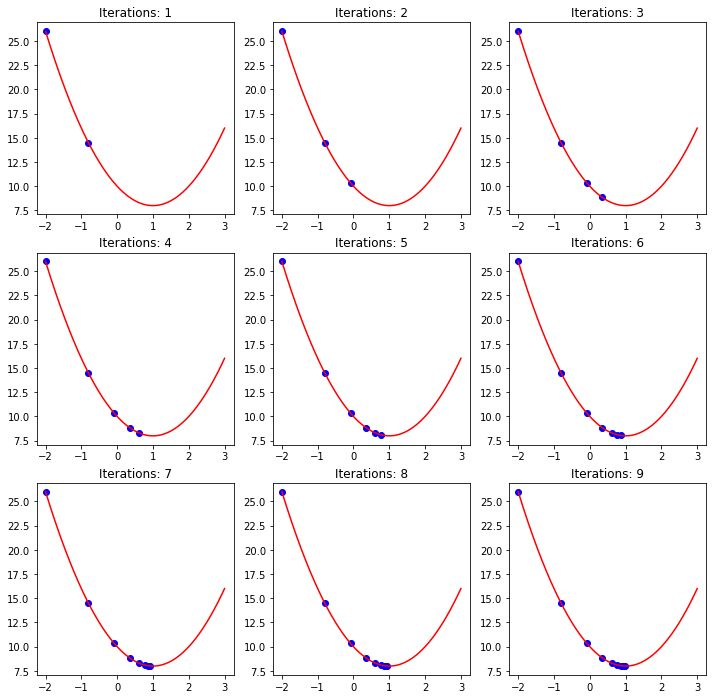

In [6]:
plot_learning_rate(f_x, df_x, 0.1)

Learning Rate: 0.4


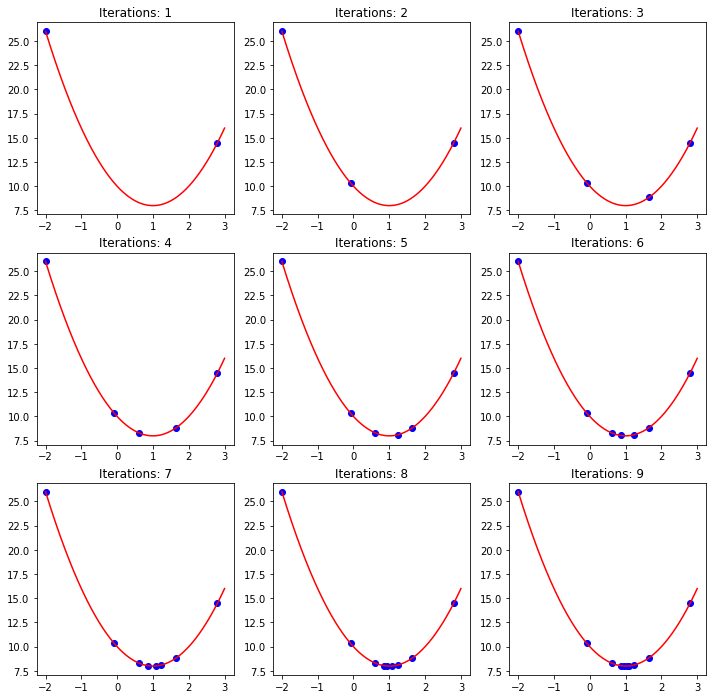

In [7]:
plot_learning_rate(f_x, df_x, 0.4)

#### Gradient Descent on non-convex functions : 

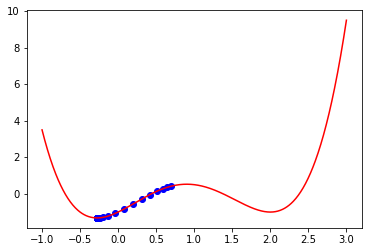

In [8]:
x = np.linspace(-1, 3, 1000)

def biquad(x):
	return x**4 - 3.5*(x**3) + 2*(x**2) + 2*x - 1

def der_biquad(x):
	return 4*(x**3) - 10.5*(x**2) + 4*(x) + 2

gradient_descent(biquad, der_biquad, 0.7, 100, 0.05)

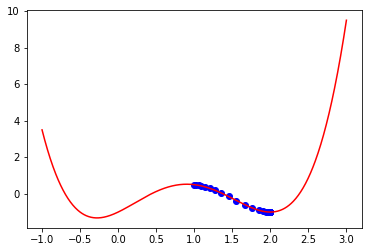

In [9]:
gradient_descent(biquad, der_biquad, 1, 100, 0.05)

### Non-Convex Optimization :


<img src="https://miro.medium.com/v2/resize:fit:600/1*favAf6-bxBs5qo_Vv0Wn4Q.png" alt="drawing" width="500"/>

### The general convex optimization problem :

Minimize the convex function $f(x)$

Subject to the convex inequality constraints $f_i(x) \leq 0, i \in \{1, 2, \ldots, m\}$

And the affine equality constraints $h_j(x) = 0, j \in \{1, 2, \ldots, n\}$

Affine function is a function of the form $h(x) = a^Tx + b$